## Imports

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Data Cleaning

* Limiting the results to before 2023-01-01 to set a hard limit from when the data is collected.
* Plotting number of runs by the release date, and the number of runs by the date the game was added to speedrun.com

In [356]:
df = pd.read_csv('../data/games_information/all_games.csv')

In [378]:
# This drops indices that have a time as none, reduces values from before 2023-01-01, and formats the timestamps correctly.
df.drop(df[df['created_date'] == 'None'].index, inplace=True)

df = df.dropna()

df['release_date'] = pd.to_datetime(df['release_date'])
df['created_date'] = pd.to_datetime(df['created_date'], format='%Y-%m-%dT%H:%M:%SZ')

df['release_date'] = pd.to_datetime(df['release_date'].dt.strftime('%Y-%m-%d'))
df['created_date'] = pd.to_datetime(df['created_date'].dt.strftime('%Y-%m-%d'))

df = df[(df['created_date'] < '2023-01-01') & (df['release_date'] < '2023-01-01')]

In [400]:
df.describe(include='all', datetime_is_numeric=True)

,game_id,game_name,release_date,created_date,num_runs
count,31426,31426,31426,31426,31426.000000
unique,31401,31380,NaN,NaN,NaN
top,pdvpmodw,Dreams,NaN,NaN,NaN
freq,2,3,NaN,NaN,NaN
mean,NaN,NaN,2009-11-29 03:16:34.565009920,2019-05-14 15:35:46.528352,81.673837
min,NaN,NaN,1972-01-01 00:00:00,2014-11-30 00:00:00,0.000000
25%,NaN,NaN,2002-07-25 06:00:00,2017-03-14 00:00:00,3.000000
50%,NaN,NaN,2012-11-06 12:00:00,2019-09-04 00:00:00,10.000000
75%,NaN,NaN,2018-10-12 00:00:00,2021-08-15 00:00:00,36.000000
max,NaN,NaN,2022-12-25 00:00:00,2022-12-31 00:00:00,39604.000000


From this data, we can learn a couple things:
 * The average number of runs for a game is 81. We can see this visually making sense with the plot of the release date vs. the number of runs. There is a very long tail of games that were released from 1970 -> ~1990 where they have very low number of runs. 
 * On average, games released past the 1990's have more runs than those released before hand.
 * There's no real correlation between the created date of a video game (the day the game is published on speedrun.com) and the number of runs of the video game.

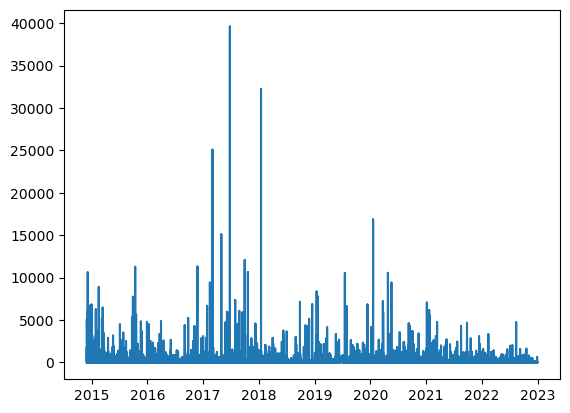

In [401]:
columns = ['created_date', 'num_runs']
df_created_date_by_num_runs = df[columns] 
df_created_date_by_num_runs.style.format({"created_date": lambda t: t.strftime("%Y-%m-%d")}) 
df_created_date_by_num_runs = df_created_date_by_num_runs.sort_values(by=['created_date'])

plt.plot(df_created_date_by_num_runs['created_date'], df_created_date_by_num_runs['num_runs'])

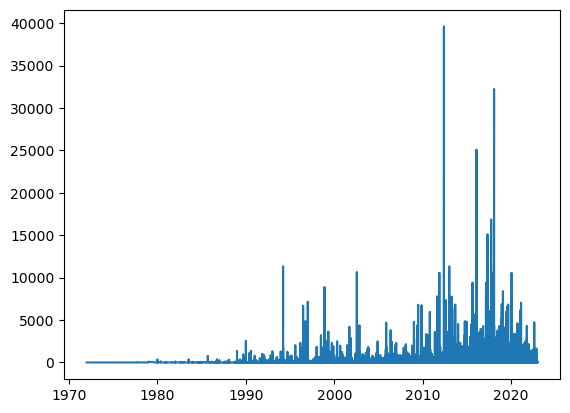

In [402]:
columns = ['release_date', 'num_runs']
df_release_date_by_num_runs = df[columns]
df_release_date_by_num_runs = df_release_date_by_num_runs.sort_values(by=['release_date'])

plt.plot(df_release_date_by_num_runs['release_date'], df_release_date_by_num_runs['num_runs'])

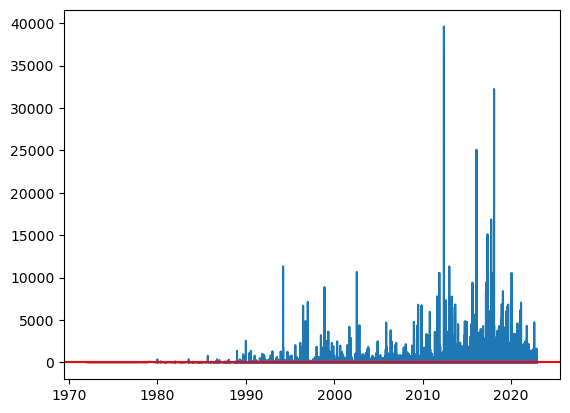

In [403]:
plt.plot(df_release_date_by_num_runs['release_date'], df_release_date_by_num_runs['num_runs'])
plt.axhline(y=df_created_date_by_num_runs['num_runs'].mean(), color='r', linestyle='-')